## 1. McCulloch–Pitts neuron 


### a) Defining the function

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Setting up X, weights and the output sign function
X = np.array([-1, -1, -1])
W = np.array([3,2,2])

Y = np.sign(np.dot(W.transpose(), X))


### b) Truth table of x1, x2

In [87]:
combinations = [(1,1), (1,-1), (-1,1), (-1,-1)]
for combination in combinations:
    x1 = combination[0]
    x2 = combination[1]
    X = np.array([-1, x1, x2])
    Y = np.sign(np.dot(W.transpose(), X))
    print("for x1")
    print(x1)
    print("and x2:")
    print(x2)
    print("  - for x1: {}, x2: {}\n    Y: {}".format(x1, x2, Y))

  - for x1: 1, x2: 1
    Y: 1
  - for x1: 1, x2: -1
    Y: -1
  - for x1: -1, x2: 1
    Y: -1
  - for x1: -1, x2: -1
    Y: -1


### Summary

- Trying out all combinations of x1, x2 show us that whenever there is a (-1/False) then output is -1/False, 
- Only when both inputs are (1/True) then output is (1/True)
- Function is logical AND

-----------------------------------------------------

## 2. Activation Functions

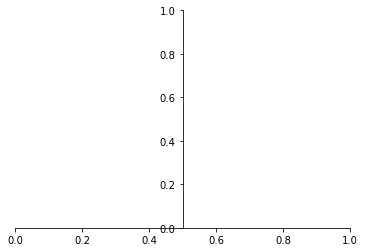

In [66]:
# Defining the plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Defining points
x = np.linspace(-5,5,100)

### a) Sigmoid function

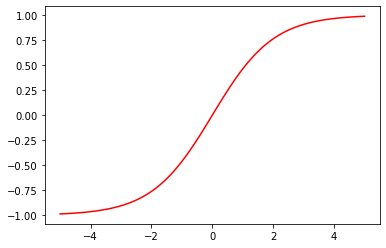

In [74]:
# Defining param (a)
a = 1

# Defining the function
y1 = 2/(1+np.exp(-a*x)) - 1

# plot the function
plt.plot(x, y1, 'r')

# show the plot
plt.show()

### b) tanh function

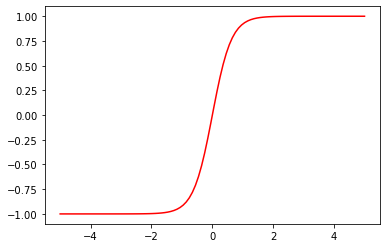

In [59]:
# Defining param (a)
a = 0.4

# Defining the function
y2 = np.tanh(4*a*x)

# plot the function
plt.plot(x,y2, 'r')

# show the plot
plt.show()

### c) Piecewise linear function

In [ ]:
# Defining param (a)
a = 10

# Defining the piecewise functions (over 4 parts)
y3 = np.piecewise(x, [x > -1/a, x < 1/a, x <= -1/a, x >= 1/a], [lambda x: a*x, lambda x: a*x, -1, 1])

# plot the function
plt.plot(x,y3, 'r')

# show the plot
plt.show()

### Summary

Choosing the parameter (a) to be large would push all the mentioned functions to be step-wise function. Parameter (a) functions as a threshold and controls the sensitivity of the function to 'fire' or no.


---------------------------------------------------------------------------------------------

## 2. Rosenblatt’s perceptron



### a. Generating the datasets

In [4]:
import numpy as np
import random

def generate_input_vector():
    x1 = random.uniform(0, 1)
    x2 = random.uniform(0, 1)
    return np.array([-1,x1,x2])

def evaluate_desired_output(x1,x2):
    if x2 >= (0.5 - x1):
        return 1
    else:
        return -1

def generate_dataset(size):
    dataset = []
    for i in range(size):
        input_vector = generate_input_vector()
        desired_output = evaluate_desired_output(input_vector[1], input_vector[2])
        dataset.append((input_vector, desired_output))
    return dataset

test_dataset = generate_dataset(10)   

test_dataset

[(array([-1.        ,  0.09686335,  0.99291296]), 1),
 (array([-1.        ,  0.99625059,  0.36600345]), 1),
 (array([-1.        ,  0.84508801,  0.97950028]), 1),
 (array([-1.        ,  0.24635212,  0.61816364]), 1),
 (array([-1.        ,  0.04317383,  0.12729915]), -1),
 (array([-1.        ,  0.39951208,  0.64801878]), 1),
 (array([-1.        ,  0.66223299,  0.53891393]), 1),
 (array([-1.        ,  0.38711434,  0.581621  ]), 1),
 (array([-1.        ,  0.28795493,  0.56969919]), 1),
 (array([-1.        ,  0.39840096,  0.7114807 ]), 1)]

### b. Defining neuron function, weight updating function and learning rate

In [5]:
# Setting up X, weights and the output sign function

DATASET_SIZE = 20
LEARNING_RATE = 0.2
MAX_EPOCHS = 50

# Weight and X are vectors
def mc_pitts_neuron(weight_vector, input_vector):
    return np.sign(np.dot(weight_vector.transpose(), input_vector))

def evaluate_updated_weight(weight, input_vector, desired_output):
    # desired_output = evaluate_desired_output(input_vector[1], input_vector[2])
    neuron_output = mc_pitts_neuron(weight, input_vector)
    print("desired output: {}, neuron output: {}".format(desired_output, neuron_output))
    multiplying_factor = LEARNING_RATE* (desired_output - neuron_output)
    return np.add(weight, np.multiply(multiplying_factor, input_vector))

def matching_weights(w1, w2):
    print("Comparing {} with {}".format(w1, w2))
    each_element_check = [format(e1, ".3f") == format(e2, ".3f") for e1, e2 in zip(w1, w2)]
    return all(each_element_check)

def run_epoch(initial_weight, dataset):
    weight = initial_weight
    for input_vector, desired_output in dataset:
        print(input_vector)
        updated_weight = evaluate_updated_weight(weight, input_vector, desired_output)
        print("prev weight: {}, updated_weight: {}".format(weight, updated_weight))
        print("-------------------------------\n")
        weight = updated_weight
    return weight

def run_training(initial_weight):
    weight = initial_weight
    training_dataset = generate_dataset(DATASET_SIZE)
    epoch_counter = 0
    while True:
        print("==================== epoch {} ========================".format(epoch_counter))
        epoch_updated_weight = run_epoch(weight, training_dataset)
        if matching_weights(weight, epoch_updated_weight) or epoch_counter == MAX_EPOCHS:
            break
        else:
            weight = epoch_updated_weight
            epoch_counter += 1
    return weight

initial_weight = np.array([3,2,2])
trained_weight = run_training(initial_weight)

==================== epoch 0 ========================
[-1.          0.3786964   0.77196899]
desired output: 1, neuron output: -1.0
prev weight: [3 2 2], updated_weight: [2.6        2.15147856 2.3087876 ]
-------------------------------

[-1.          0.15870303  0.83725435]
desired output: 1, neuron output: -1.0
prev weight: [2.6        2.15147856 2.3087876 ], updated_weight: [2.2        2.21495977 2.64368933]
-------------------------------

[-1.          0.11724257  0.24787822]
desired output: -1, neuron output: -1.0
prev weight: [2.2        2.21495977 2.64368933], updated_weight: [2.2        2.21495977 2.64368933]
-------------------------------

[-1.          0.59710675  0.02424858]
desired output: 1, neuron output: -1.0
prev weight: [2.2        2.21495977 2.64368933], updated_weight: [1.8        2.45380248 2.65338877]
-------------------------------

[-1.          0.68107509  0.8548339 ]
desired output: 1, neuron output: 1.0
prev weight: [1.8        2.45380248 2.65338877], updated

### c. Validating through validation dataset

In [36]:
VALIDATION_DATASET_SIZE = 5000

def validate_neuron(trained_weight):
    validation_dataset = generate_dataset(VALIDATION_DATASET_SIZE)
    successes = 0
    in_out = []
    for input_vector, desired_output in validation_dataset:
        trained_neuron_output = mc_pitts_neuron(trained_weight, input_vector)
        # print("desired output: {}, neuron output: {}".format(desired_output, trained_neuron_output))
        in_out.append({"input_vector": input_vector, "desired_output": desired_output, "trained_output": trained_neuron_output})
        if trained_neuron_output == desired_output:
            successes += 1
    print("Successes: {}/{}".format(successes, VALIDATION_DATASET_SIZE))
    return in_out


validation_dataset = validate_neuron(trained_weight)

Successes: 4921/5000


### d. Plotting the data

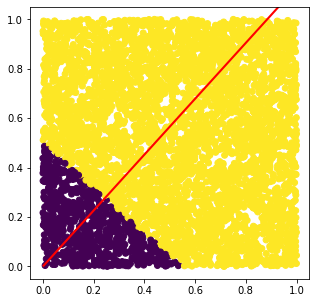

In [42]:
fig, ax = plt.subplots(figsize=(5, 5))

input_x = [datapoint["input_vector"] for datapoint in validation_dataset]
x1 = [x[1] for x in input_x]
x2 = [x[2] for x in input_x]
trained_y = [datapoint["trained_output"] for datapoint in validation_dataset]

ax.scatter(x1, x2, c=trained_y, label=trained_y)
ax.quiver(0,0, trained_weight[1], trained_weight[2], scale=0.5, color='r')

# ax.set_title('XOR problem')


-----------
**TODOS:**

- [ ] Change to OOP to be able to reuse the neuron code
- [x] Add comments             DONE
- [x] (c) Test on new dataset  DONE
- [x] (d) plot                 DONE